# Demonstração da Aplicação Braillingo
****

## Importação dos Pacotes
***

In [11]:
from image_generator import image_generator # pacote para geração de imagens em braille
from obr import optical_braille_recognition # pacote de detecção de caracteres em imagens
import matplotlib.pyplot as plt # pacote de visualização gráfica

## Geração das Imagens de Teste
***

In [2]:
def demo_input_text(string_txt, caractere_separator = ','):
    '''
    separa uma string de texto em várias linhas a partir de um separador 

    Args:
        string_txt (str) --> string de texto
        caractere_separator (str) --> caractere que indica uma quebra de linha na string

    Returns:
        list_txts (list) --> lista contendo as linhas do texto separadas
    '''

    max_len = max_len_string(string_txt.split(caractere_separator))

    list_txts = list()
    for string in string_txt.split(caractere_separator):
        if len(string) < max_len:
            while len(string) < max_len:
                string += ' '
        list_txts.append(string)
    
    return list_txts

In [3]:
def max_len_string(list_strings):
    '''
    retorna a quantidade de caracteres do maior elemento da lista de strings

    Args:
        list_strings (list) --> lista de strings

    Returns:
        lenght (int) --> quantidade de caracteres da maior string na lista 
    '''

    lenght = 0
    for string in list_strings:
        if len(string) > lenght:
            lenght = len(string)
    
    return lenght

Text(0.5, 1.0, 'alysson machado\nfrancinildo figueiredo\niury chagas')

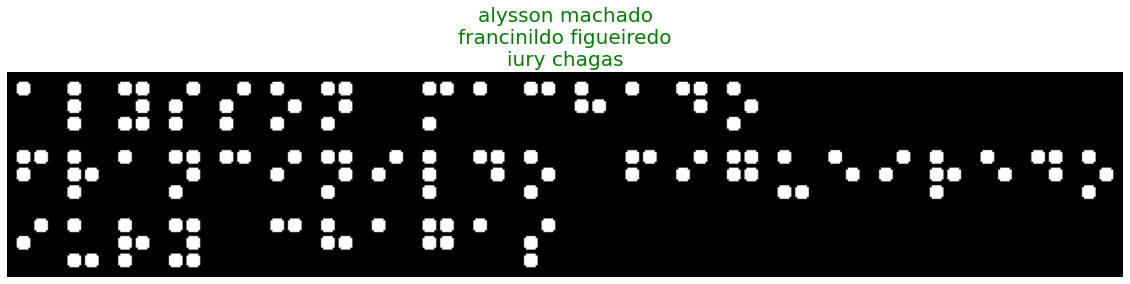

In [10]:
# carregando um texto digitado pelo usuário
string_input = input("Insira o texto: ")
# separando o texto em várias linhas 
string_list = demo_input_text(string_input.replace(', ', ','), ',')
# plotando uma imagem em braille com base no texto fornecido  
image = image_generator().string_to_column_braille(string_list)

# visualizando a imagem gerada pelo algoritmo
plt.figure(figsize = (20, 10))
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.title(string_input.replace(', ', '\n'), size = 20, color = 'green')

## Separação dos Caracteres
***

In [ ]:
# plotando o histograma das abscissas e das ordenadas com base na imagem gerada
hist_x = optical_braille_recognition().make_histogram_x(image)
hist_y = optical_braille_recognition().make_histogram_y(image)



In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
# Create a meshgrid of coordinates (0,1,...,N) times (0,1,...,N)
y, x = np.mgrid[:len(data[0, :, 0]), :len(data[0, 0, :])]
# duplicating the grids
xcoord, ycoord = np.array([x] * len(data)), np.array([y] * len(data))
# compute histogram with coordinates as x,y
h, xe, ye = np.histogram2d(
    xcoord.ravel(), ycoord.ravel(),
    bins=[len(data[0, 0, :]), len(data[0, :, 0])],
    weights=stars.ravel())

# Projected histograms inx and y
hx, hy = h.sum(axis=0), h.sum(axis=1)

# Define size of figure
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(10, 12)

# Define the positions of the subplots.
ax0 = plt.subplot(gs[6:10, 5:9])
axx = plt.subplot(gs[5:6, 5:9])
axy = plt.subplot(gs[6:10, 9:10])

ax0.imshow(h, cmap=plt.cm.viridis, interpolation='nearest',
           origin='lower', vmin=0.)

# Remove tick labels
nullfmt = NullFormatter()
axx.xaxis.set_major_formatter(nullfmt)
axx.yaxis.set_major_formatter(nullfmt)
axy.xaxis.set_major_formatter(nullfmt)
axy.yaxis.set_major_formatter(nullfmt)

# Top plot
axx.plot(hx)
axx.set_xlim(ax0.get_xlim())
# Right plot
axy.plot(hy, range(len(hy)))
axy.set_ylim(ax0.get_ylim())

fig.tight_layout()
plt.savefig('del.png')